In [14]:
import numpy as np
import pandas as pd
from tqdm import trange
import os
import re
import ast

# Convert 'values' from string to real numpy arrays
def parse_values(val):
    if isinstance(val, str):
        # Remove square brackets and split by whitespace
        val = val.strip().strip("[]").strip(",")
        # Handle empty entries gracefully
        if not val:
            return np.array([])
        # Split on whitespace and convert to float
        return np.array([float(x) for x in re.split(r"\s+", val.strip())])
    elif isinstance(val, (list, np.ndarray)):
        return np.array(val)
    else:
        return np.array([])



# ===================================================================================================
folder_path = "data"
# ===================================================================================================


metric_names = [
    "normalized_velocity_alignment",
    "velocity_deviation",
    "sidewise_acceleration_deviation",
    "longitudinal_acceleration_deviation",
    "first_pca_component",
    "second_pca_component",
    "first_pca_component_velocity_alignment",
    "second_pca_component_velocity_alignment",
]

dfs = {}

for metric in metric_names:
    filepath = folder_path + '/' + metric + '_df.csv'
    metric_df = pd.read_csv(filepath, index_col=0)
    # metric_df['values'] = metric_df['values'].apply(parse_values)
    metric_df['values'] = np.array(metric_df['values'].apply(ast.literal_eval))
    dfs[metric] = metric_df


In [15]:
metric_arrays = {}

for metric in metric_names:
    metric_df = dfs[metric]
    arrays = [np.array(v, dtype=float) for v in metric_df['values']
    if isinstance(v, (list, np.ndarray))]

    values = np.concatenate(arrays)
    metric_arrays[metric] = values

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

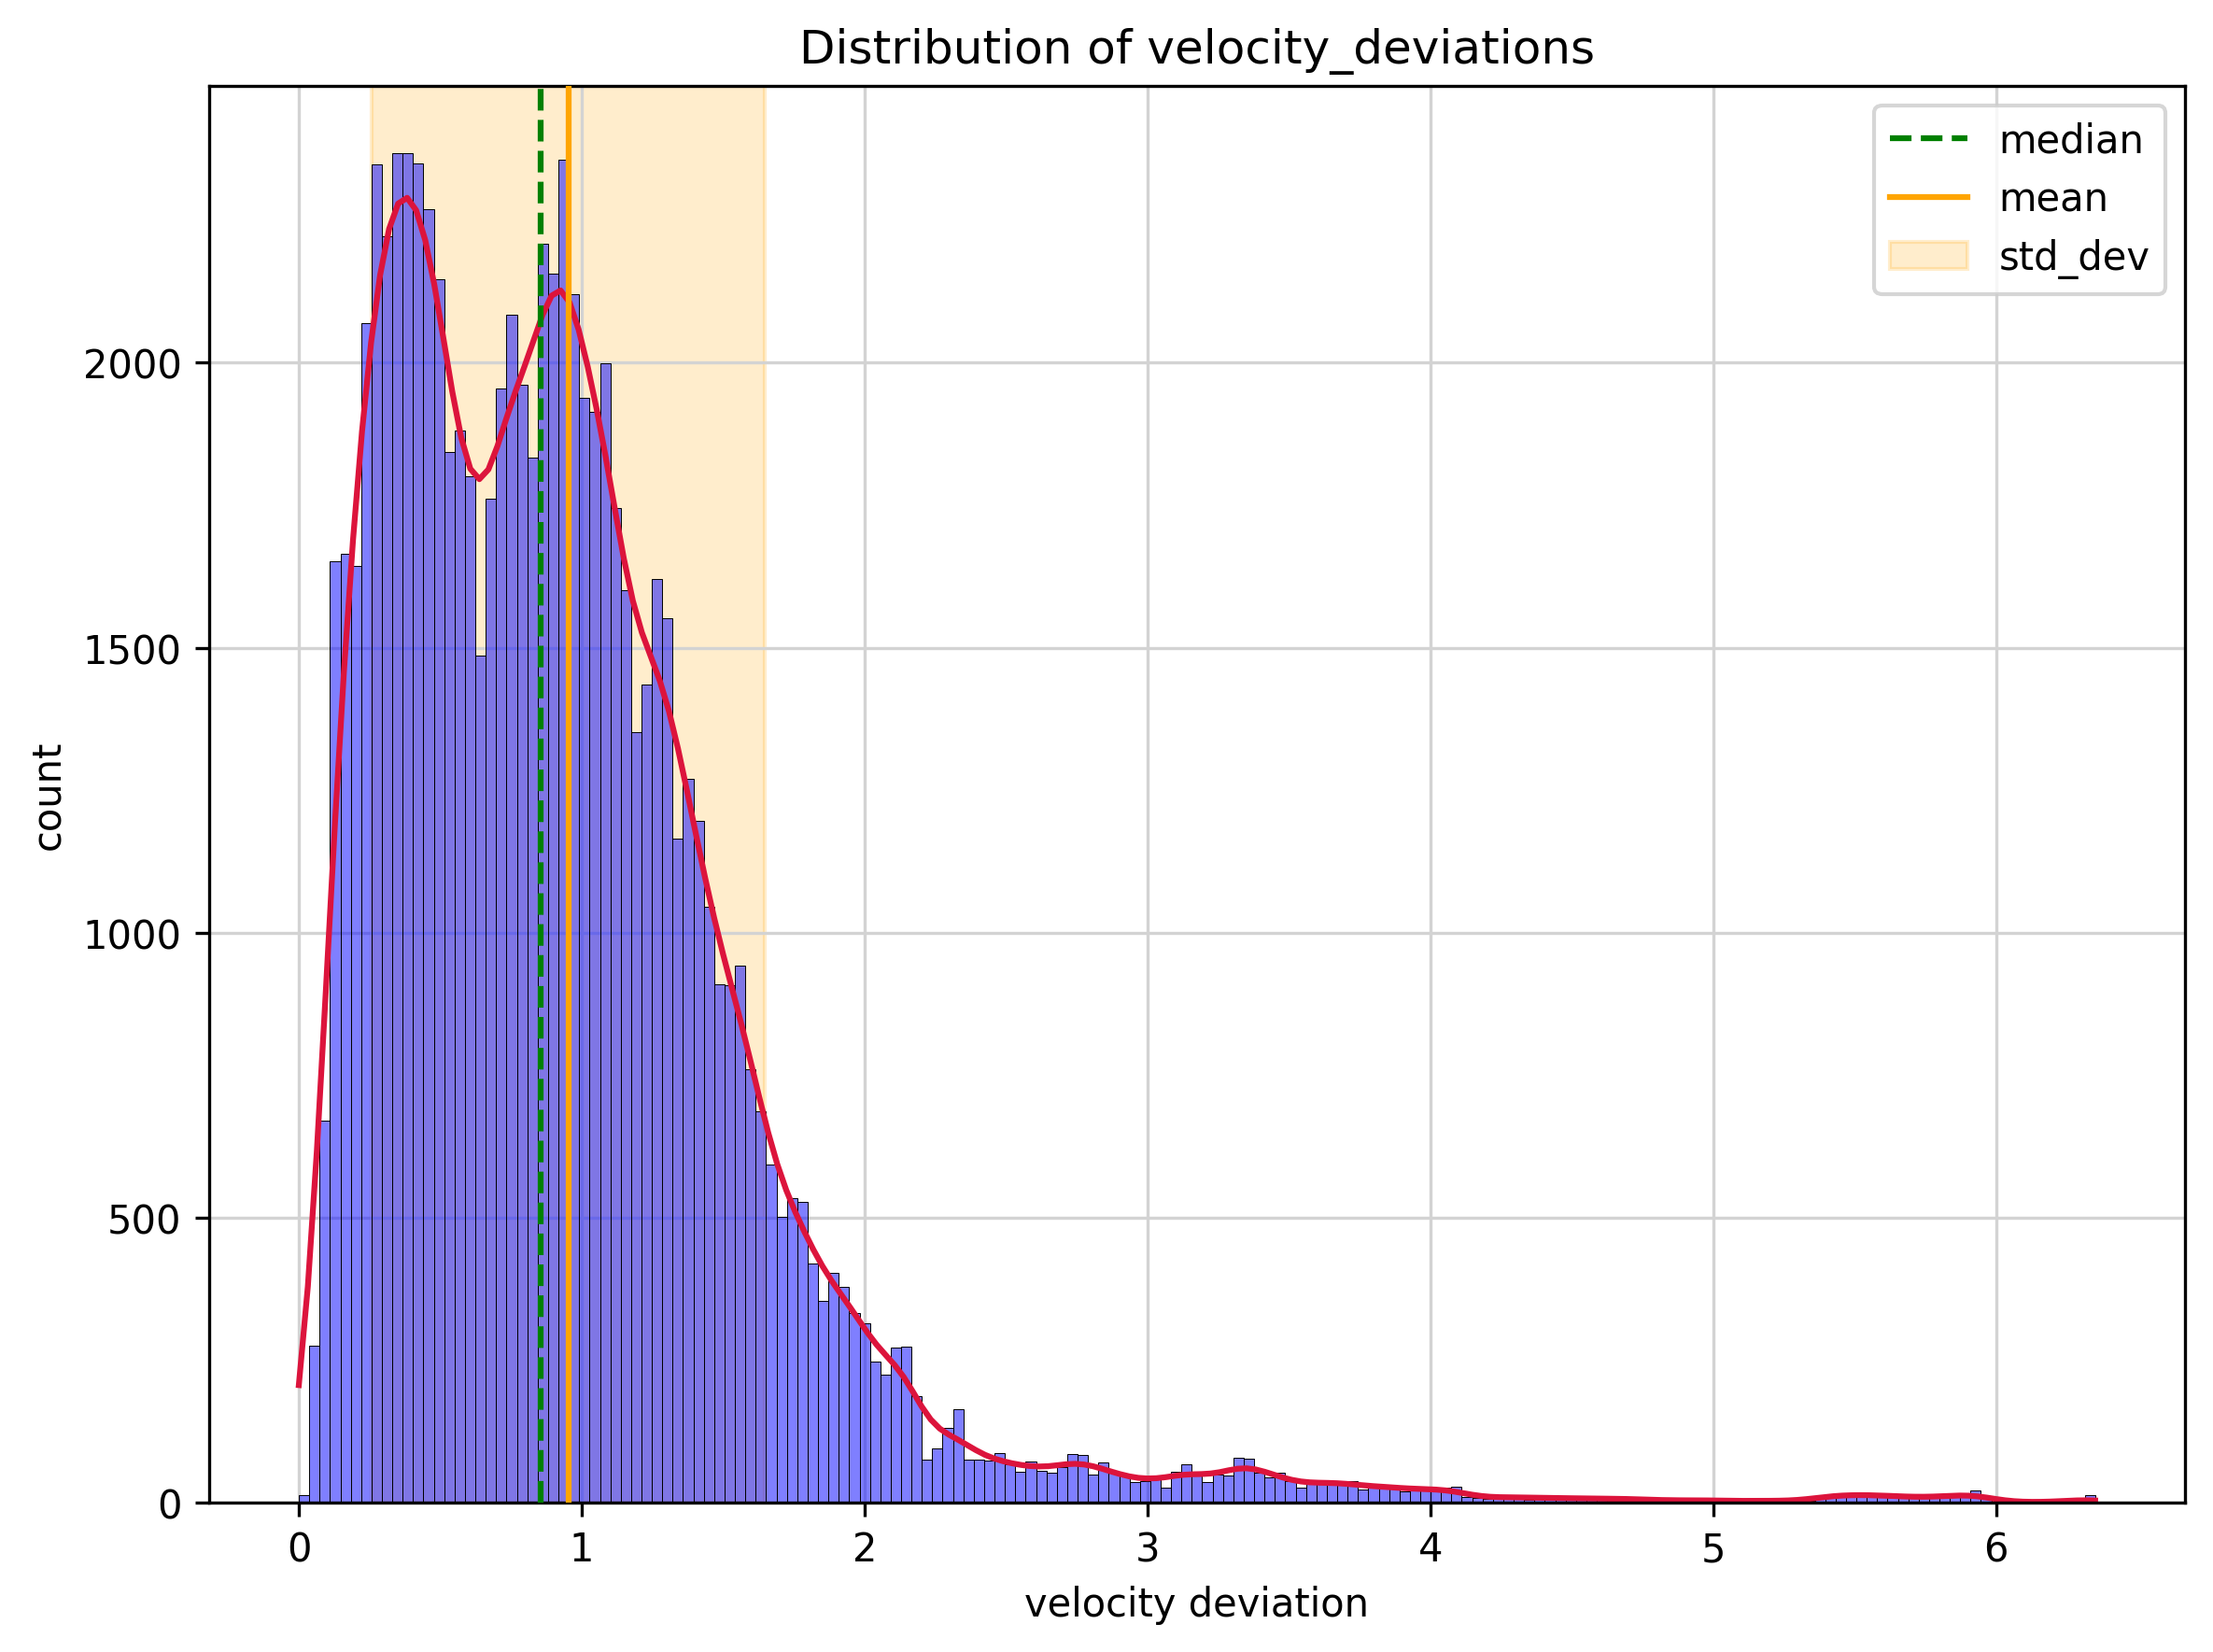

In [17]:
values = metric_arrays['velocity_deviation']

values = values[np.isfinite(values)]
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of velocity_deviations')
plt.xlabel('velocity deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


In [18]:
"""
values = velocity_alignments

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of velocity_alignments')
plt.xlabel('velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()
"""

'\nvalues = velocity_alignments\n\nvalues = values[np.isfinite(values)]\nmean = np.mean(values)\nmean = np.mean(values)\nmedian = np.median(values)\nstd_dev = np.std(values)\n\n\nfig = plt.figure(figsize=(8, 6), dpi=300)\n\nax = sns.histplot(values, color="blue", kde=True, zorder=2)\n\n\nfor line in ax.lines:\n    line.set_color(\'crimson\')\n\nplt.grid(color="lightgrey", zorder=0)\n\nax.axvline(median, color=\'green\', label=\'median\', linestyle=\'--\', zorder=3)\nax.axvline(mean, color=\'orange\', label=\'mean\', linestyle=\'-\', zorder=3)\nax.axvspan(mean - std_dev, mean + std_dev, color=\'orange\', alpha=0.2, zorder=1, label=\'std_dev\')\n\n\n# figure prettiness\nplt.title(\'Distribution of velocity_alignments\')\nplt.xlabel(\'velocity alignment\')\nplt.ylabel(\'count\')\nplt.legend()\n\nplt.tight_layout()\n\nplt.show()\n'

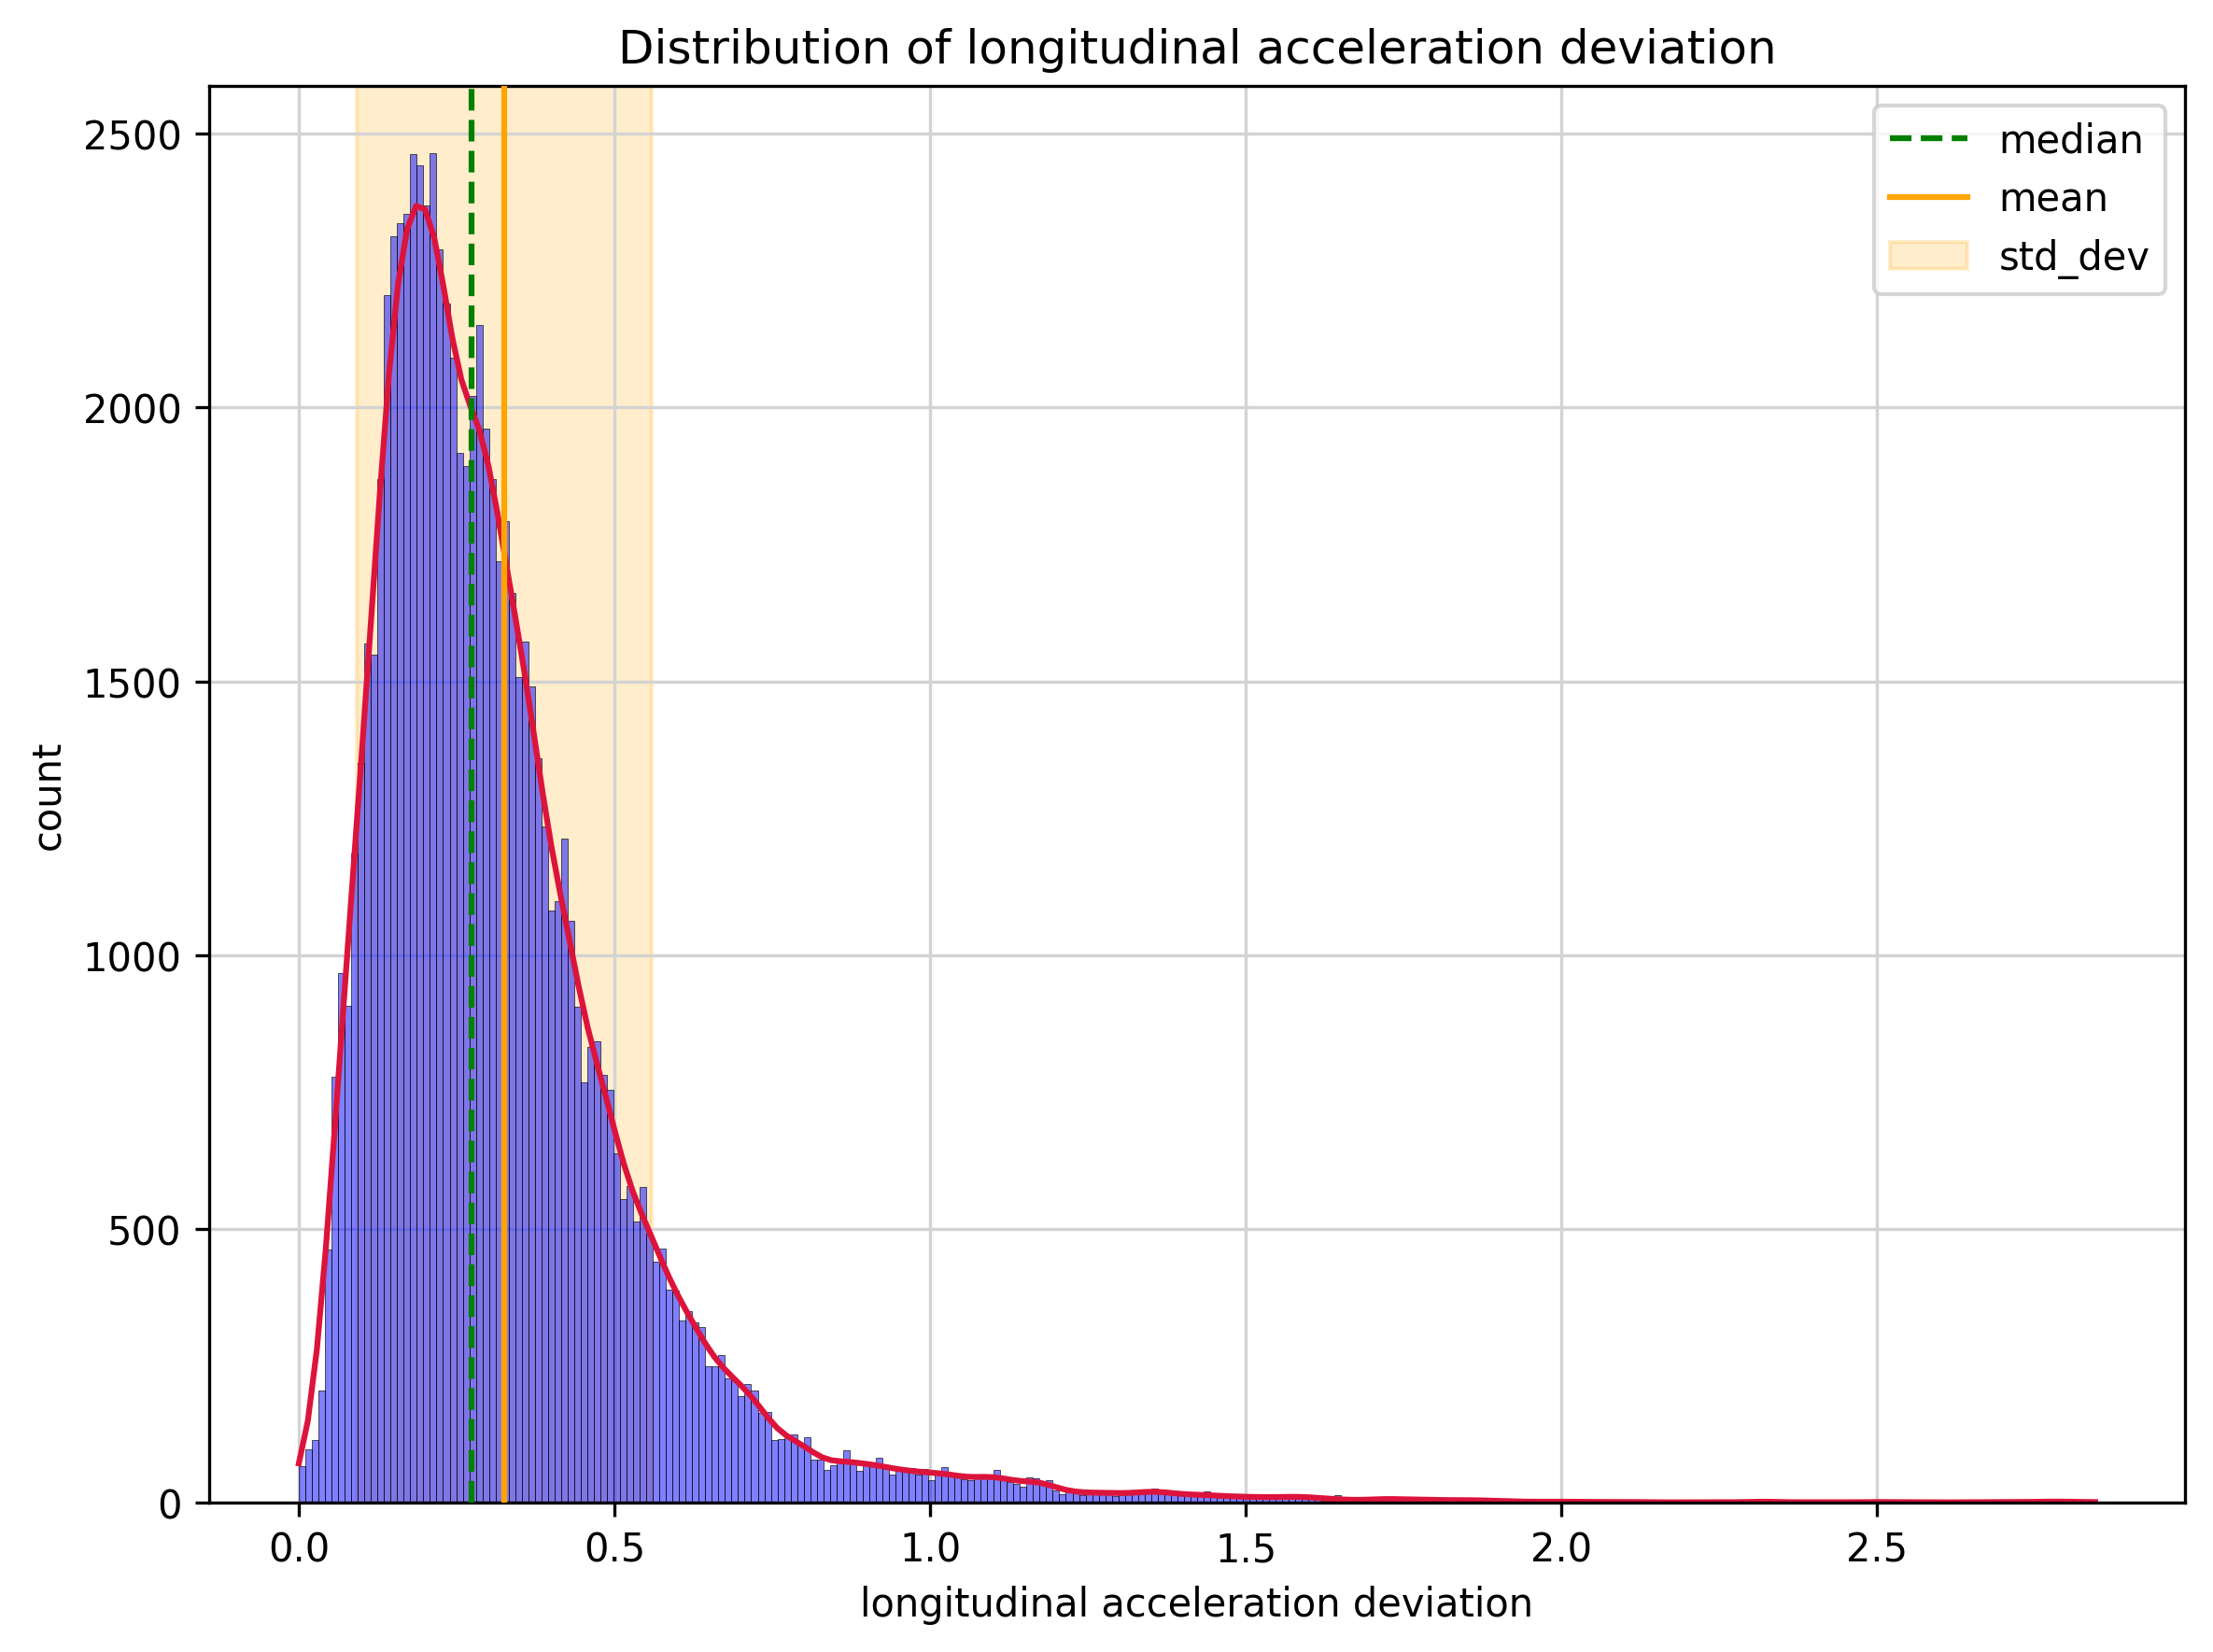

In [19]:
values = metric_arrays['longitudinal_acceleration_deviation']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of longitudinal acceleration deviation')
plt.xlabel('longitudinal acceleration deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


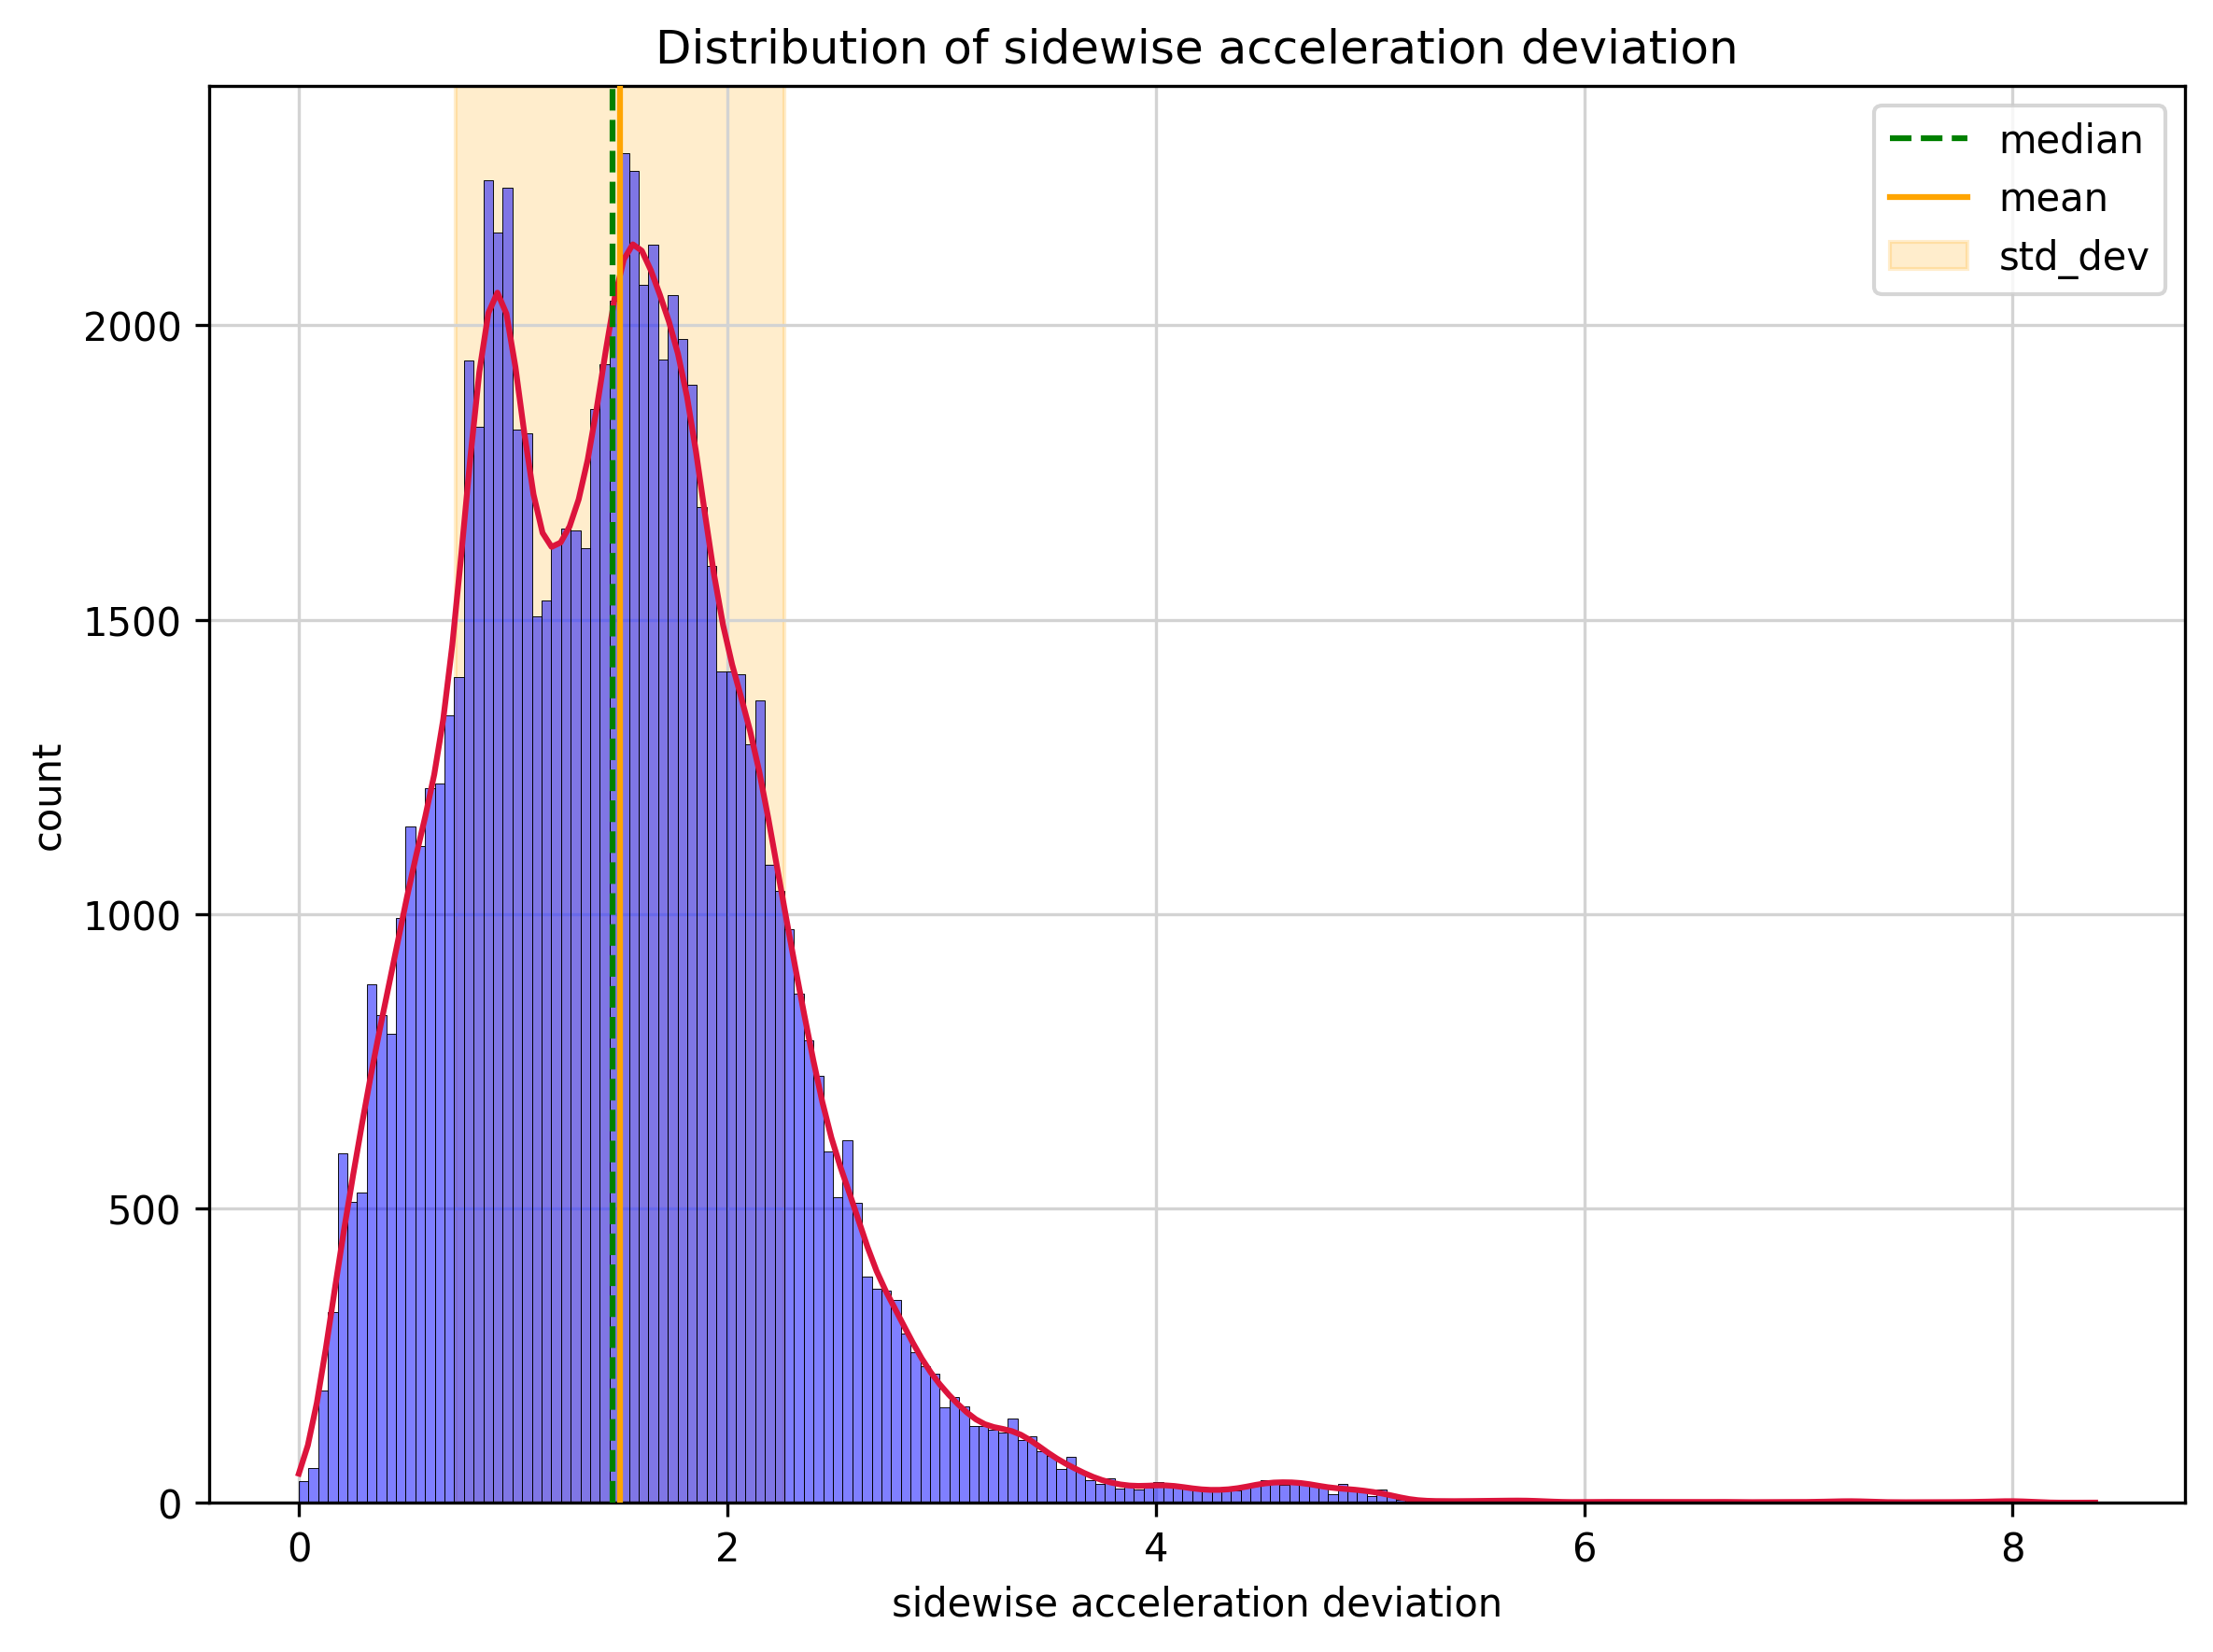

In [20]:
values = metric_arrays['sidewise_acceleration_deviation']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')


# figure prettiness
plt.title('Distribution of sidewise acceleration deviation')
plt.xlabel('sidewise acceleration deviation')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


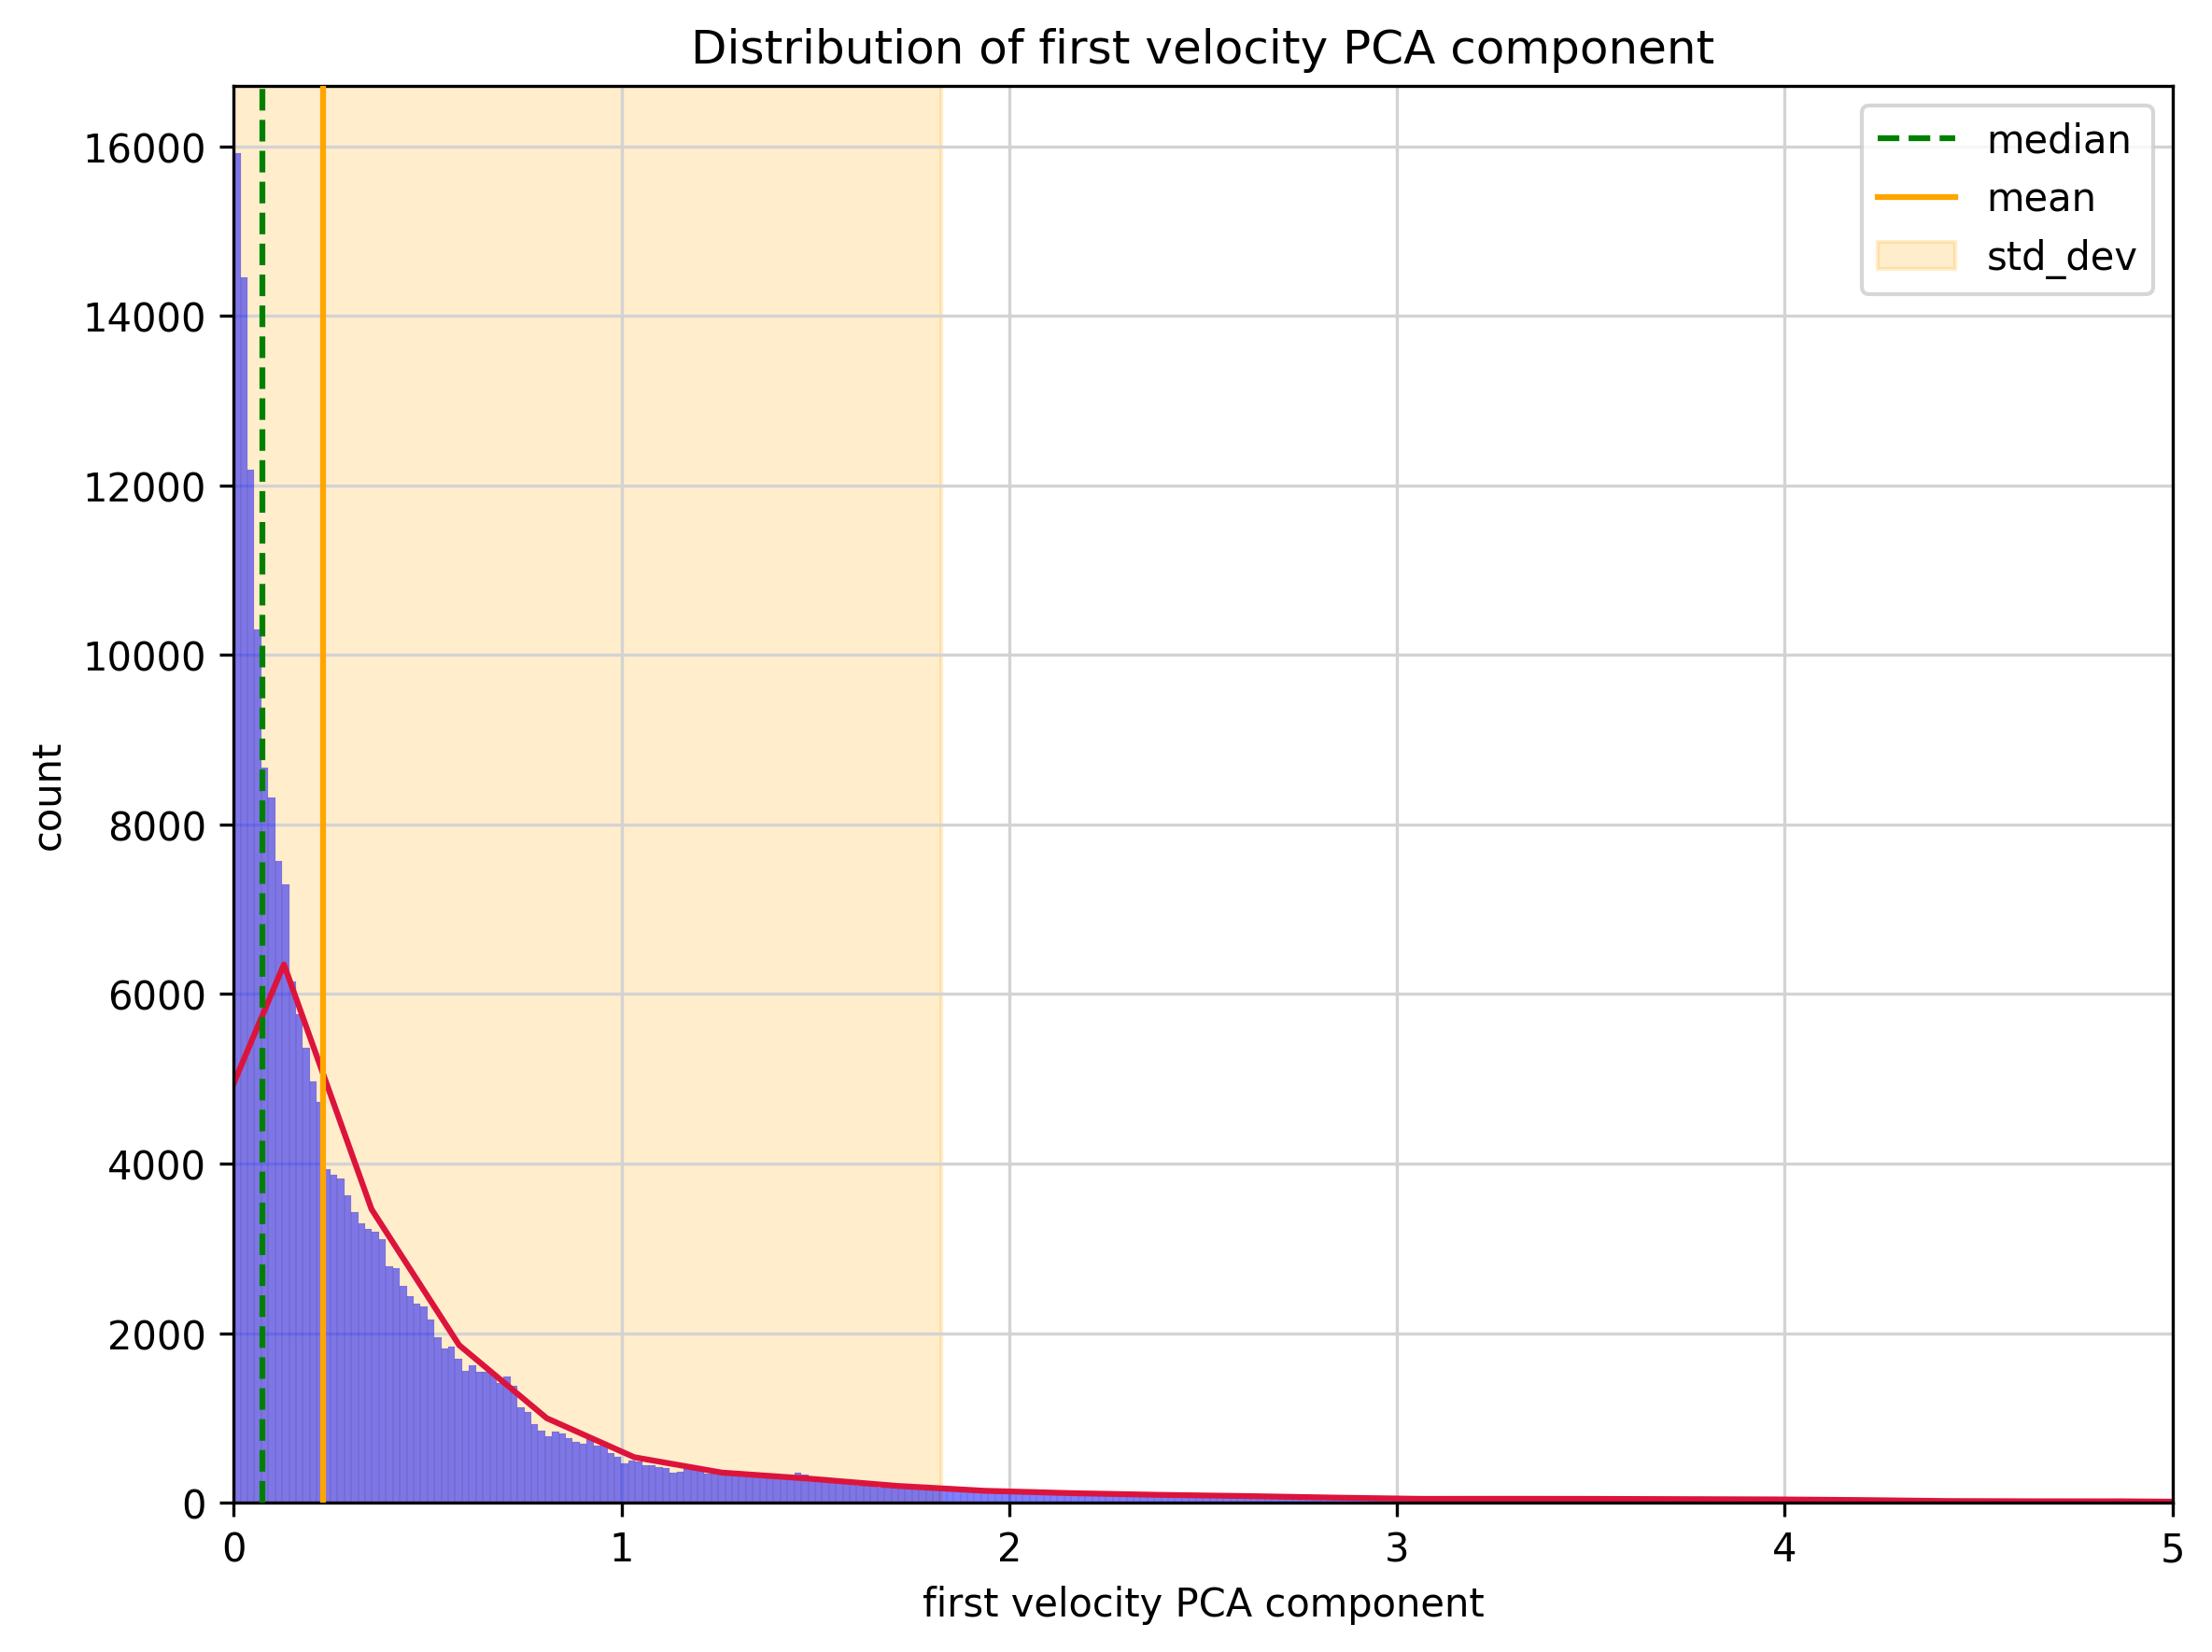

In [21]:
values = metric_arrays['first_pca_component']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')
ax.set_xlim(0, 5)


# figure prettiness
plt.title('Distribution of first velocity PCA component')
plt.xlabel('first velocity PCA component')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()


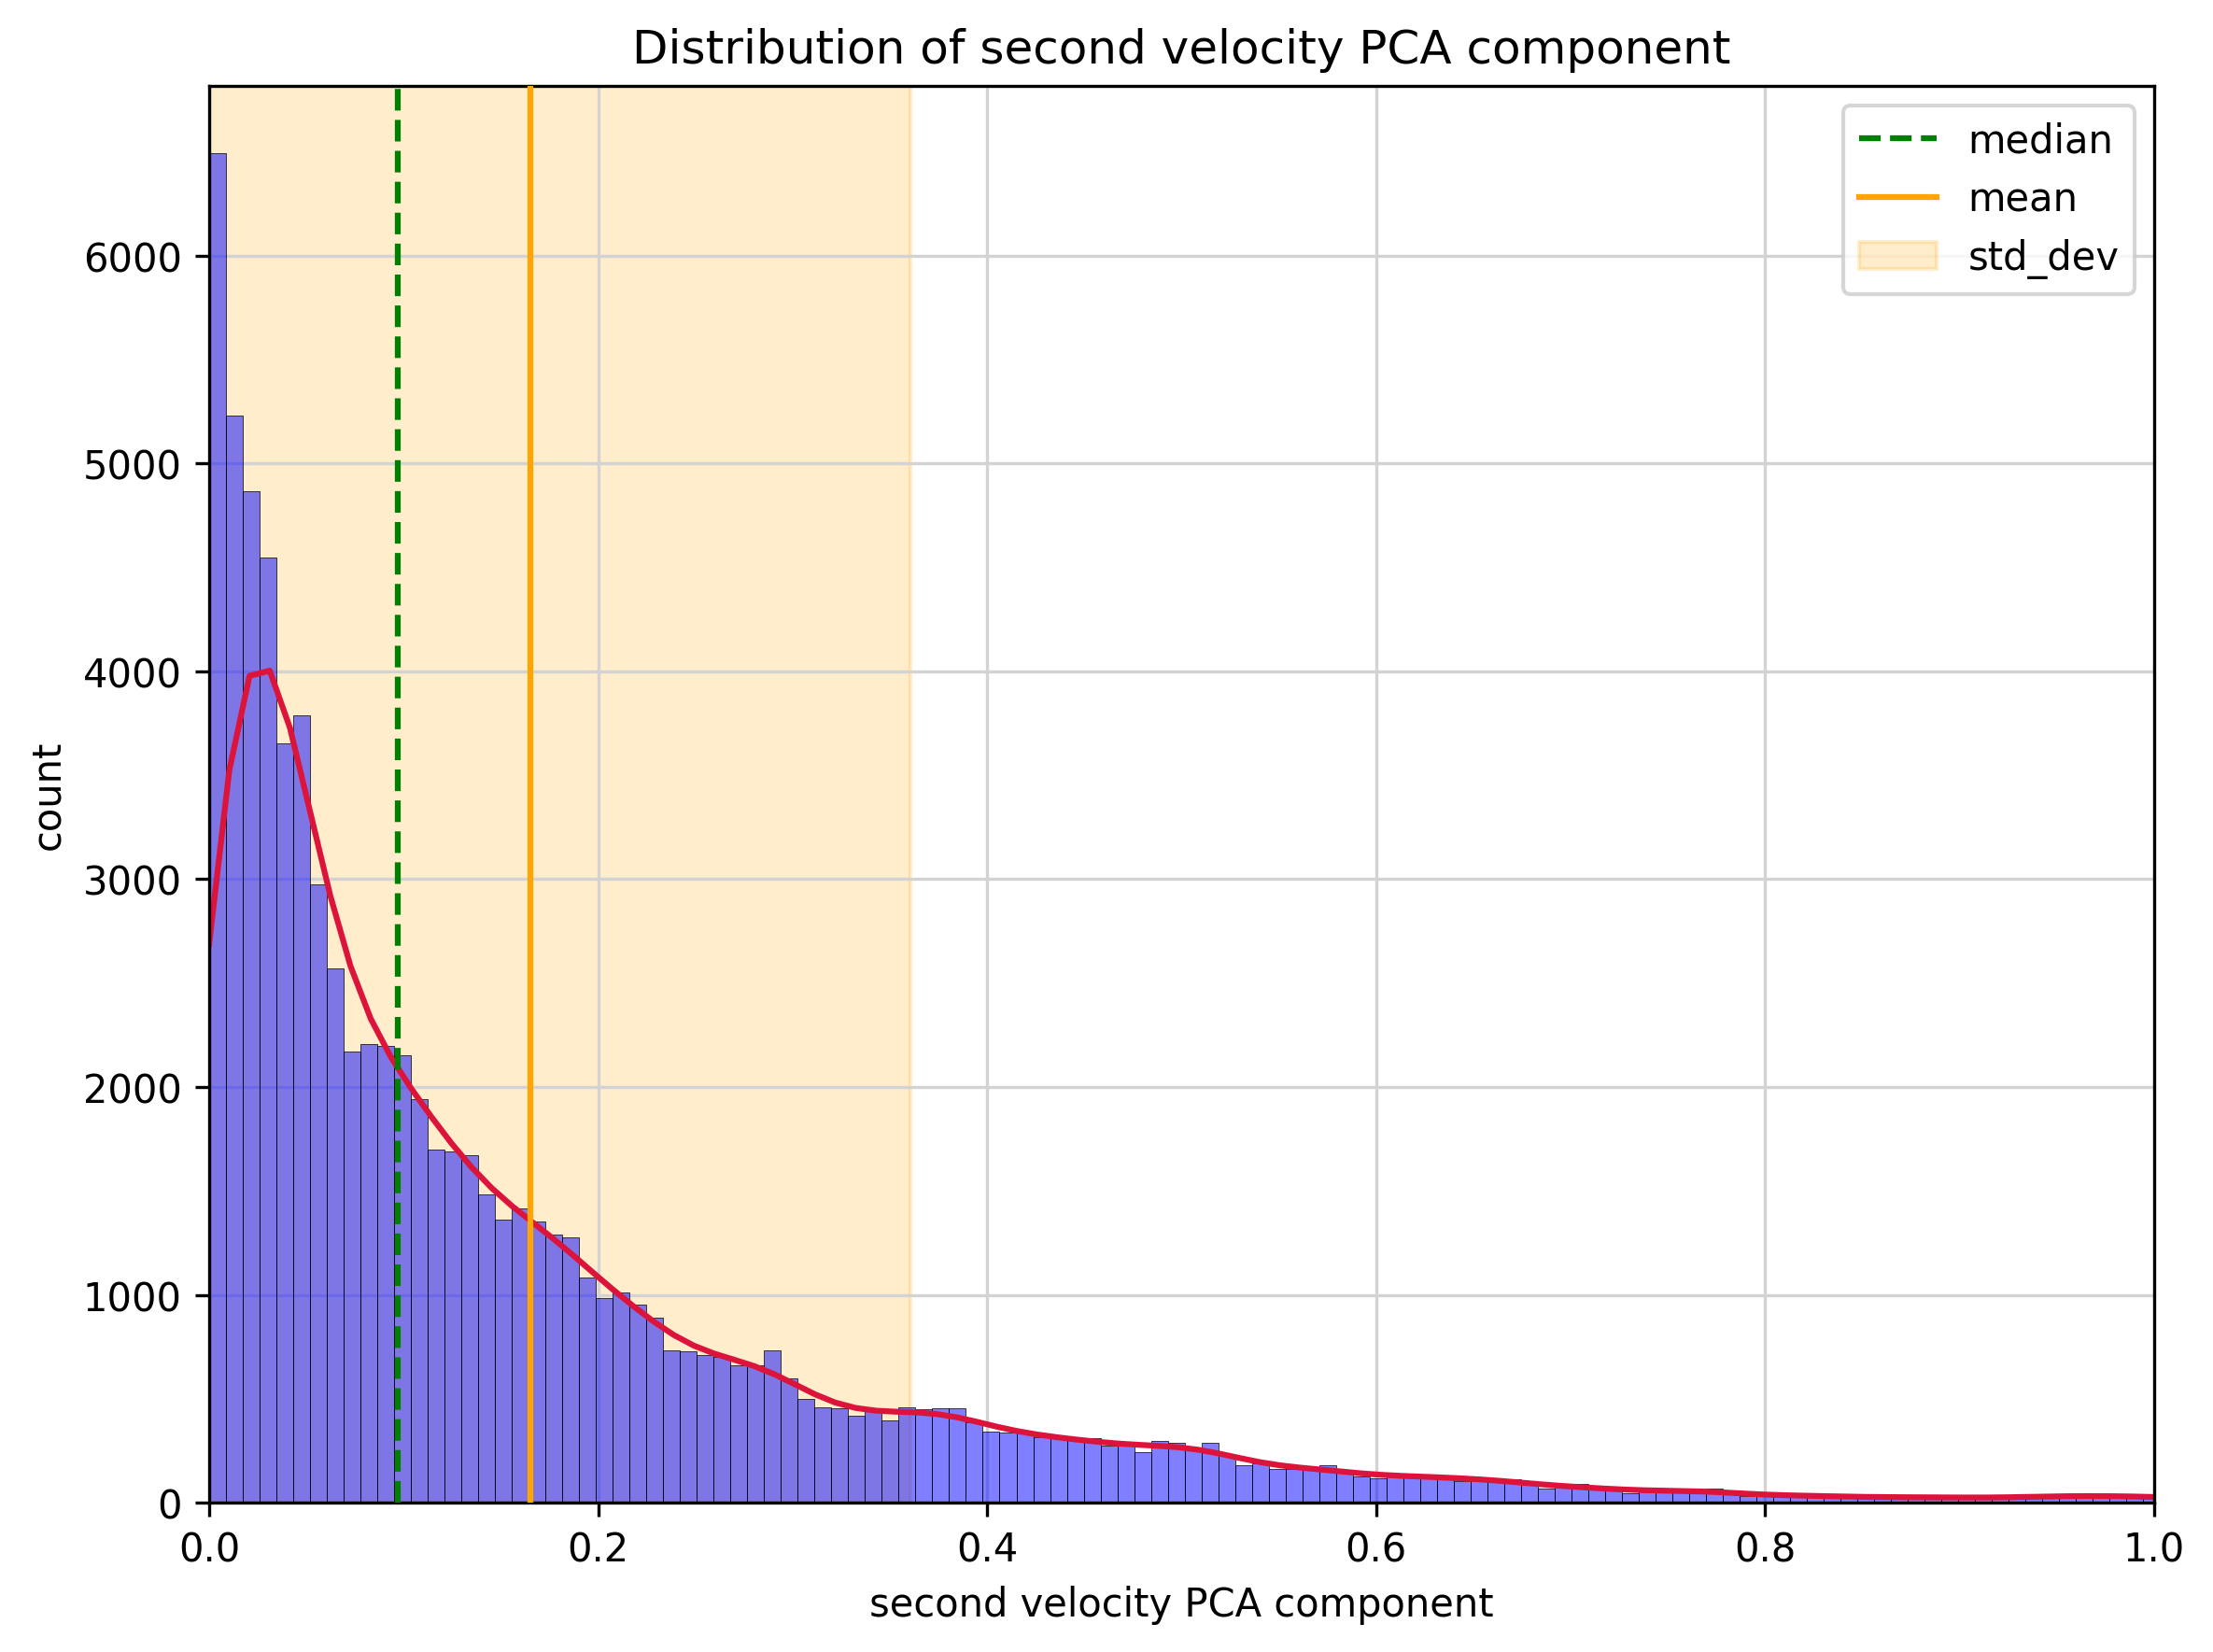

In [22]:
values = metric_arrays['second_pca_component']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')

ax.set_xlim(0, 1)


# figure prettiness
plt.title('Distribution of second velocity PCA component')
plt.xlabel('second velocity PCA component')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()



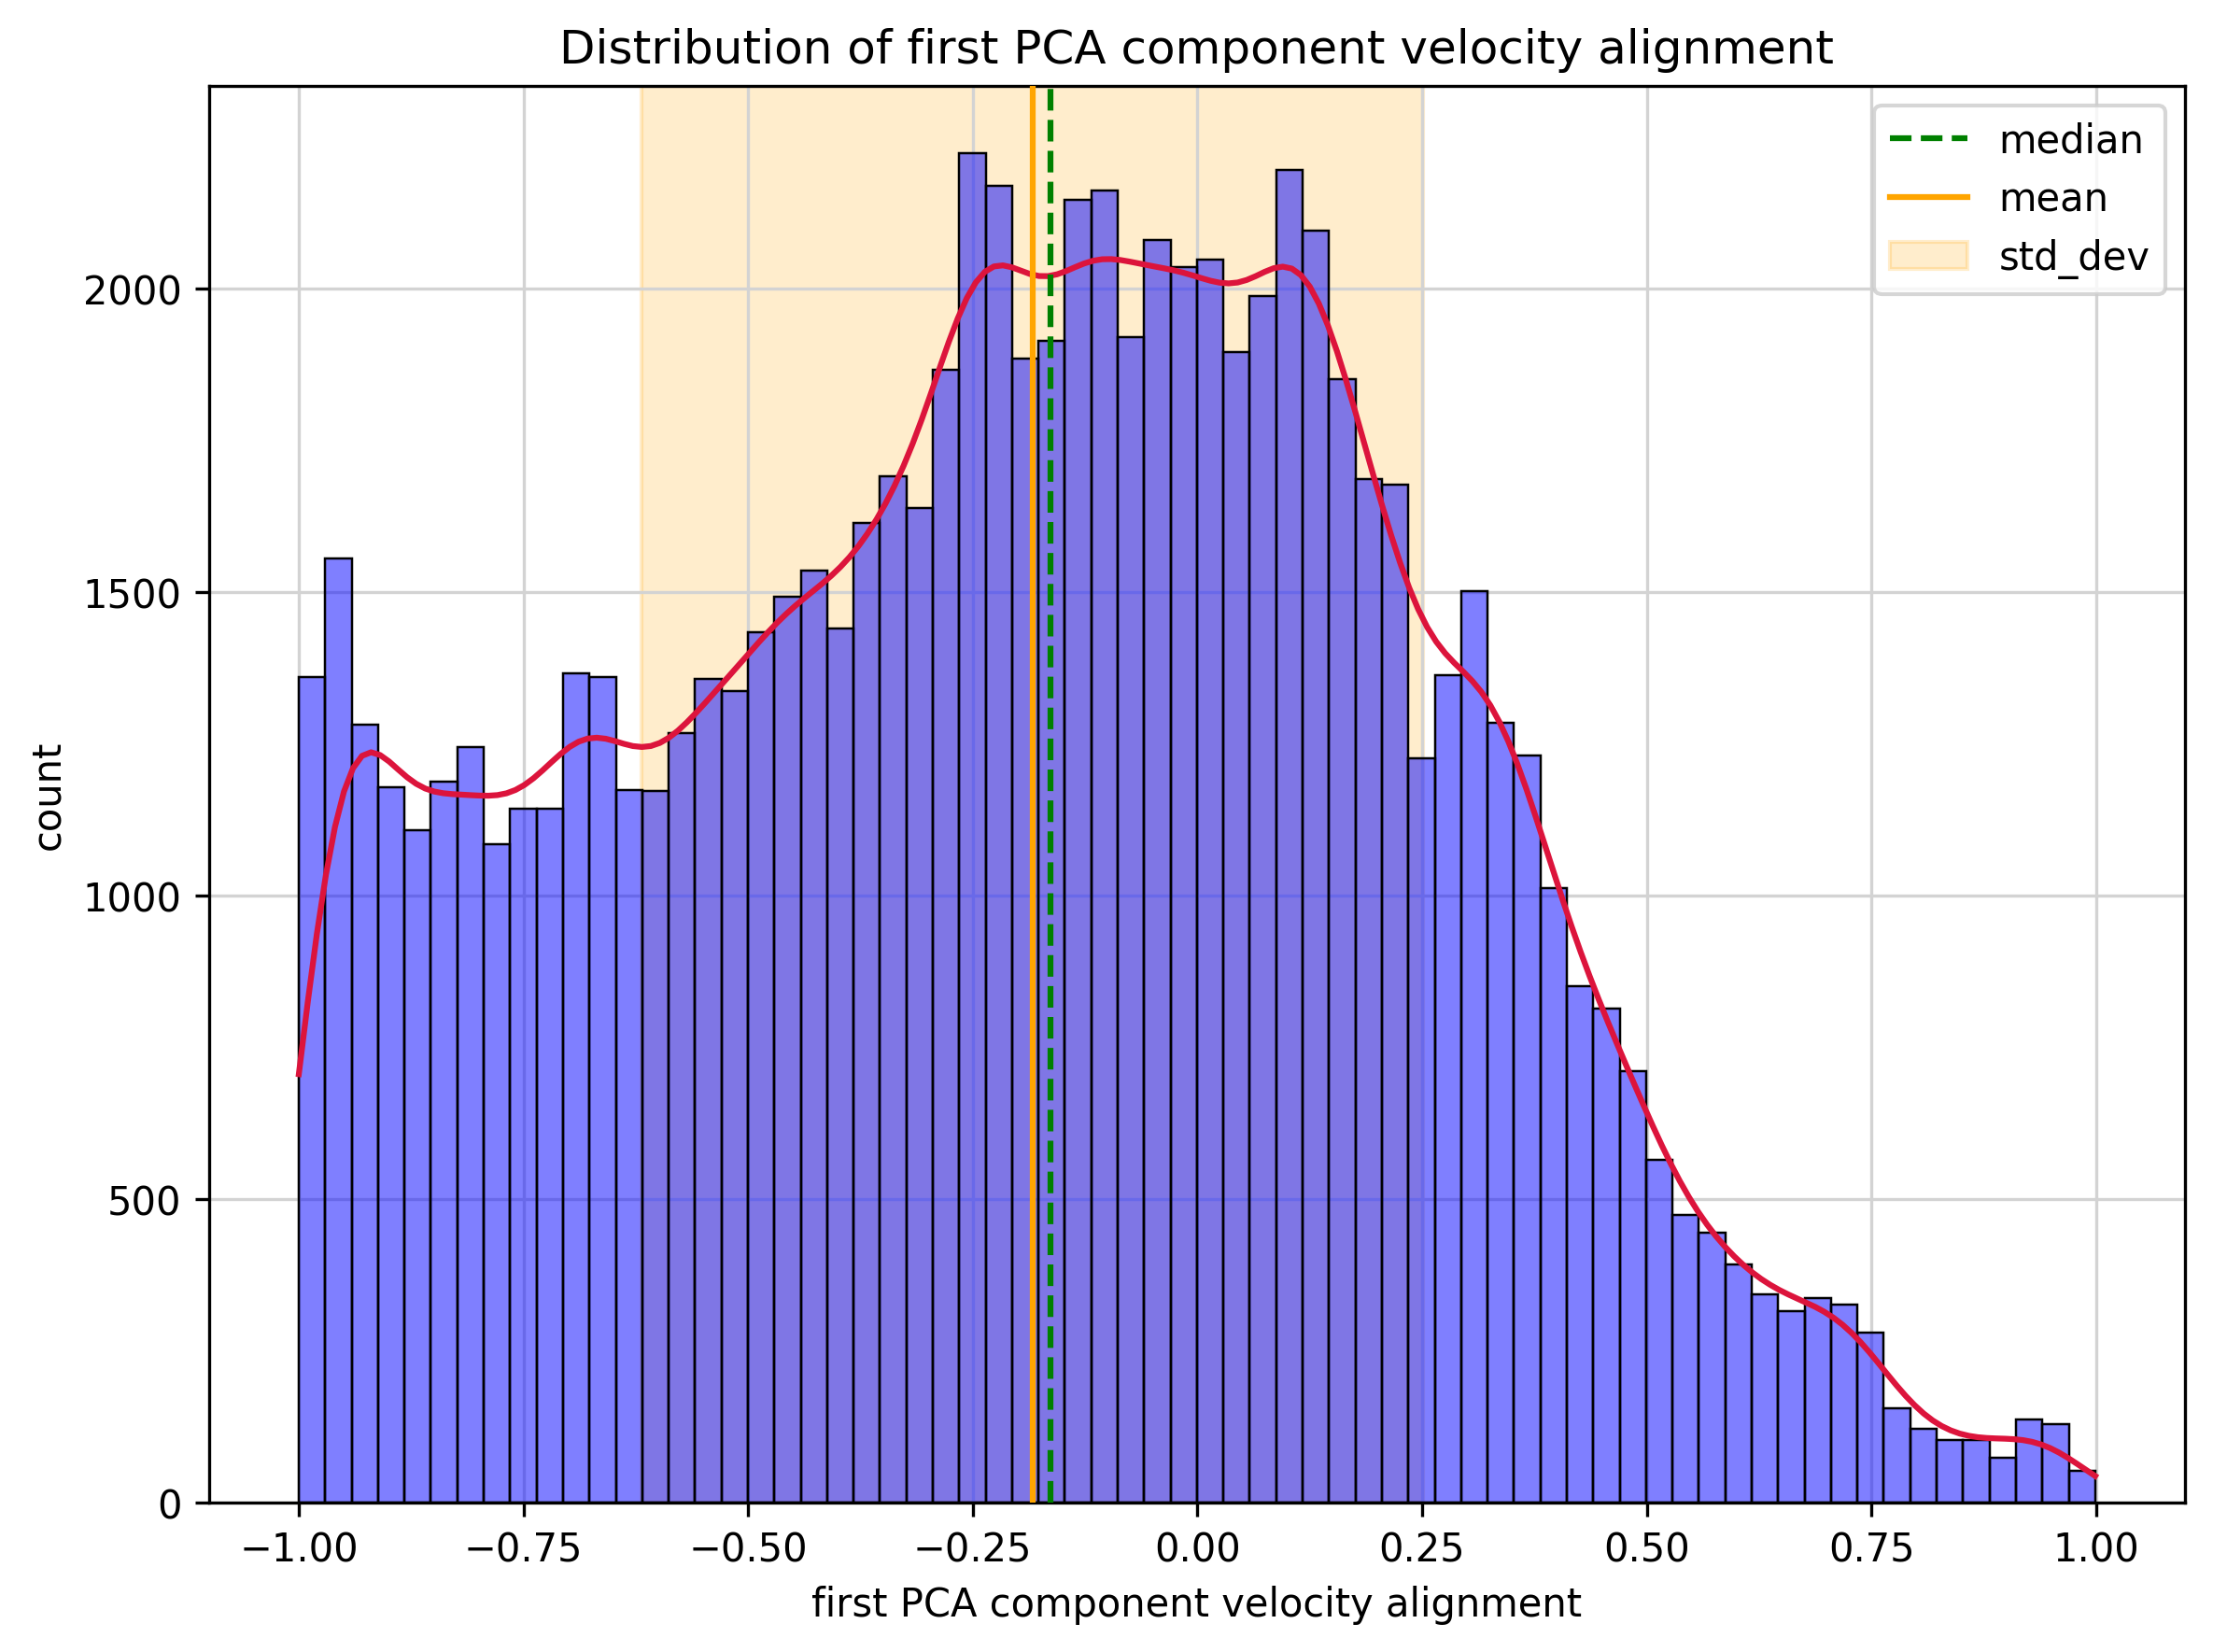

In [23]:
values = metric_arrays['first_pca_component_velocity_alignment']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')



# figure prettiness
plt.title('Distribution of first PCA component velocity alignment')
plt.xlabel('first PCA component velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()



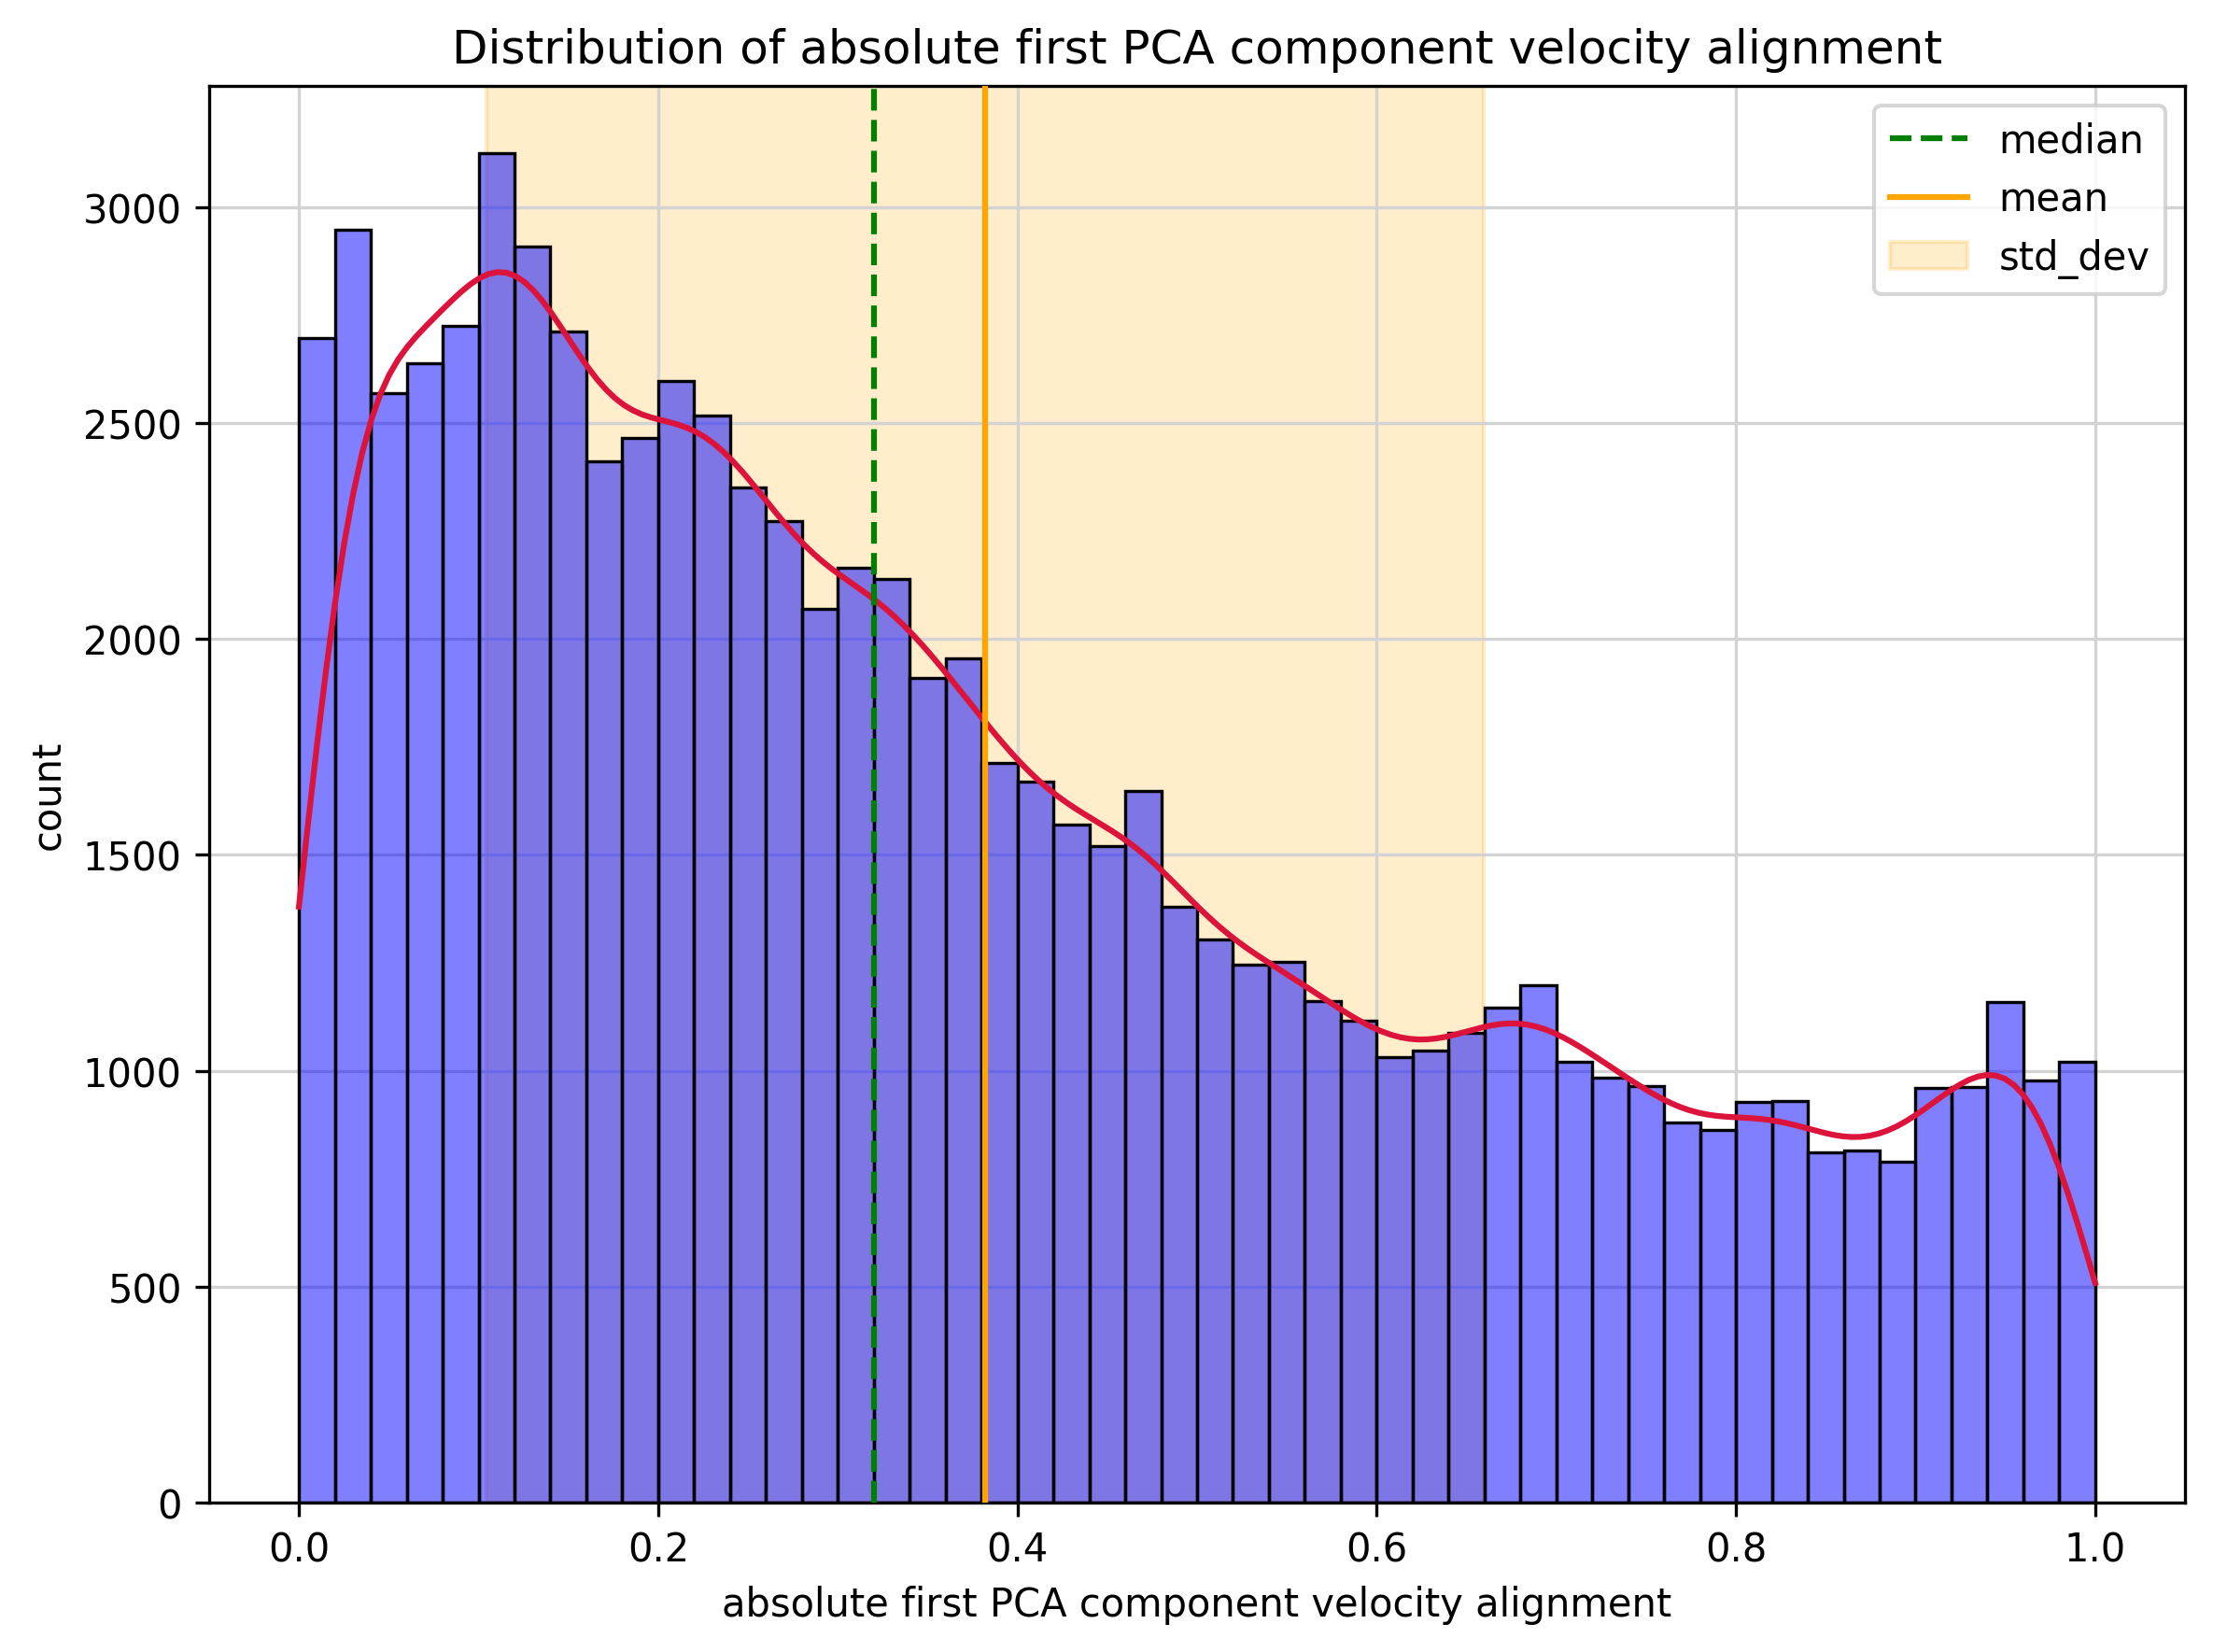

In [24]:
values = metric_arrays['first_pca_component_velocity_alignment']

values = np.abs(values)
values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')



# figure prettiness
plt.title('Distribution of absolute first PCA component velocity alignment')
plt.xlabel('absolute first PCA component velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()



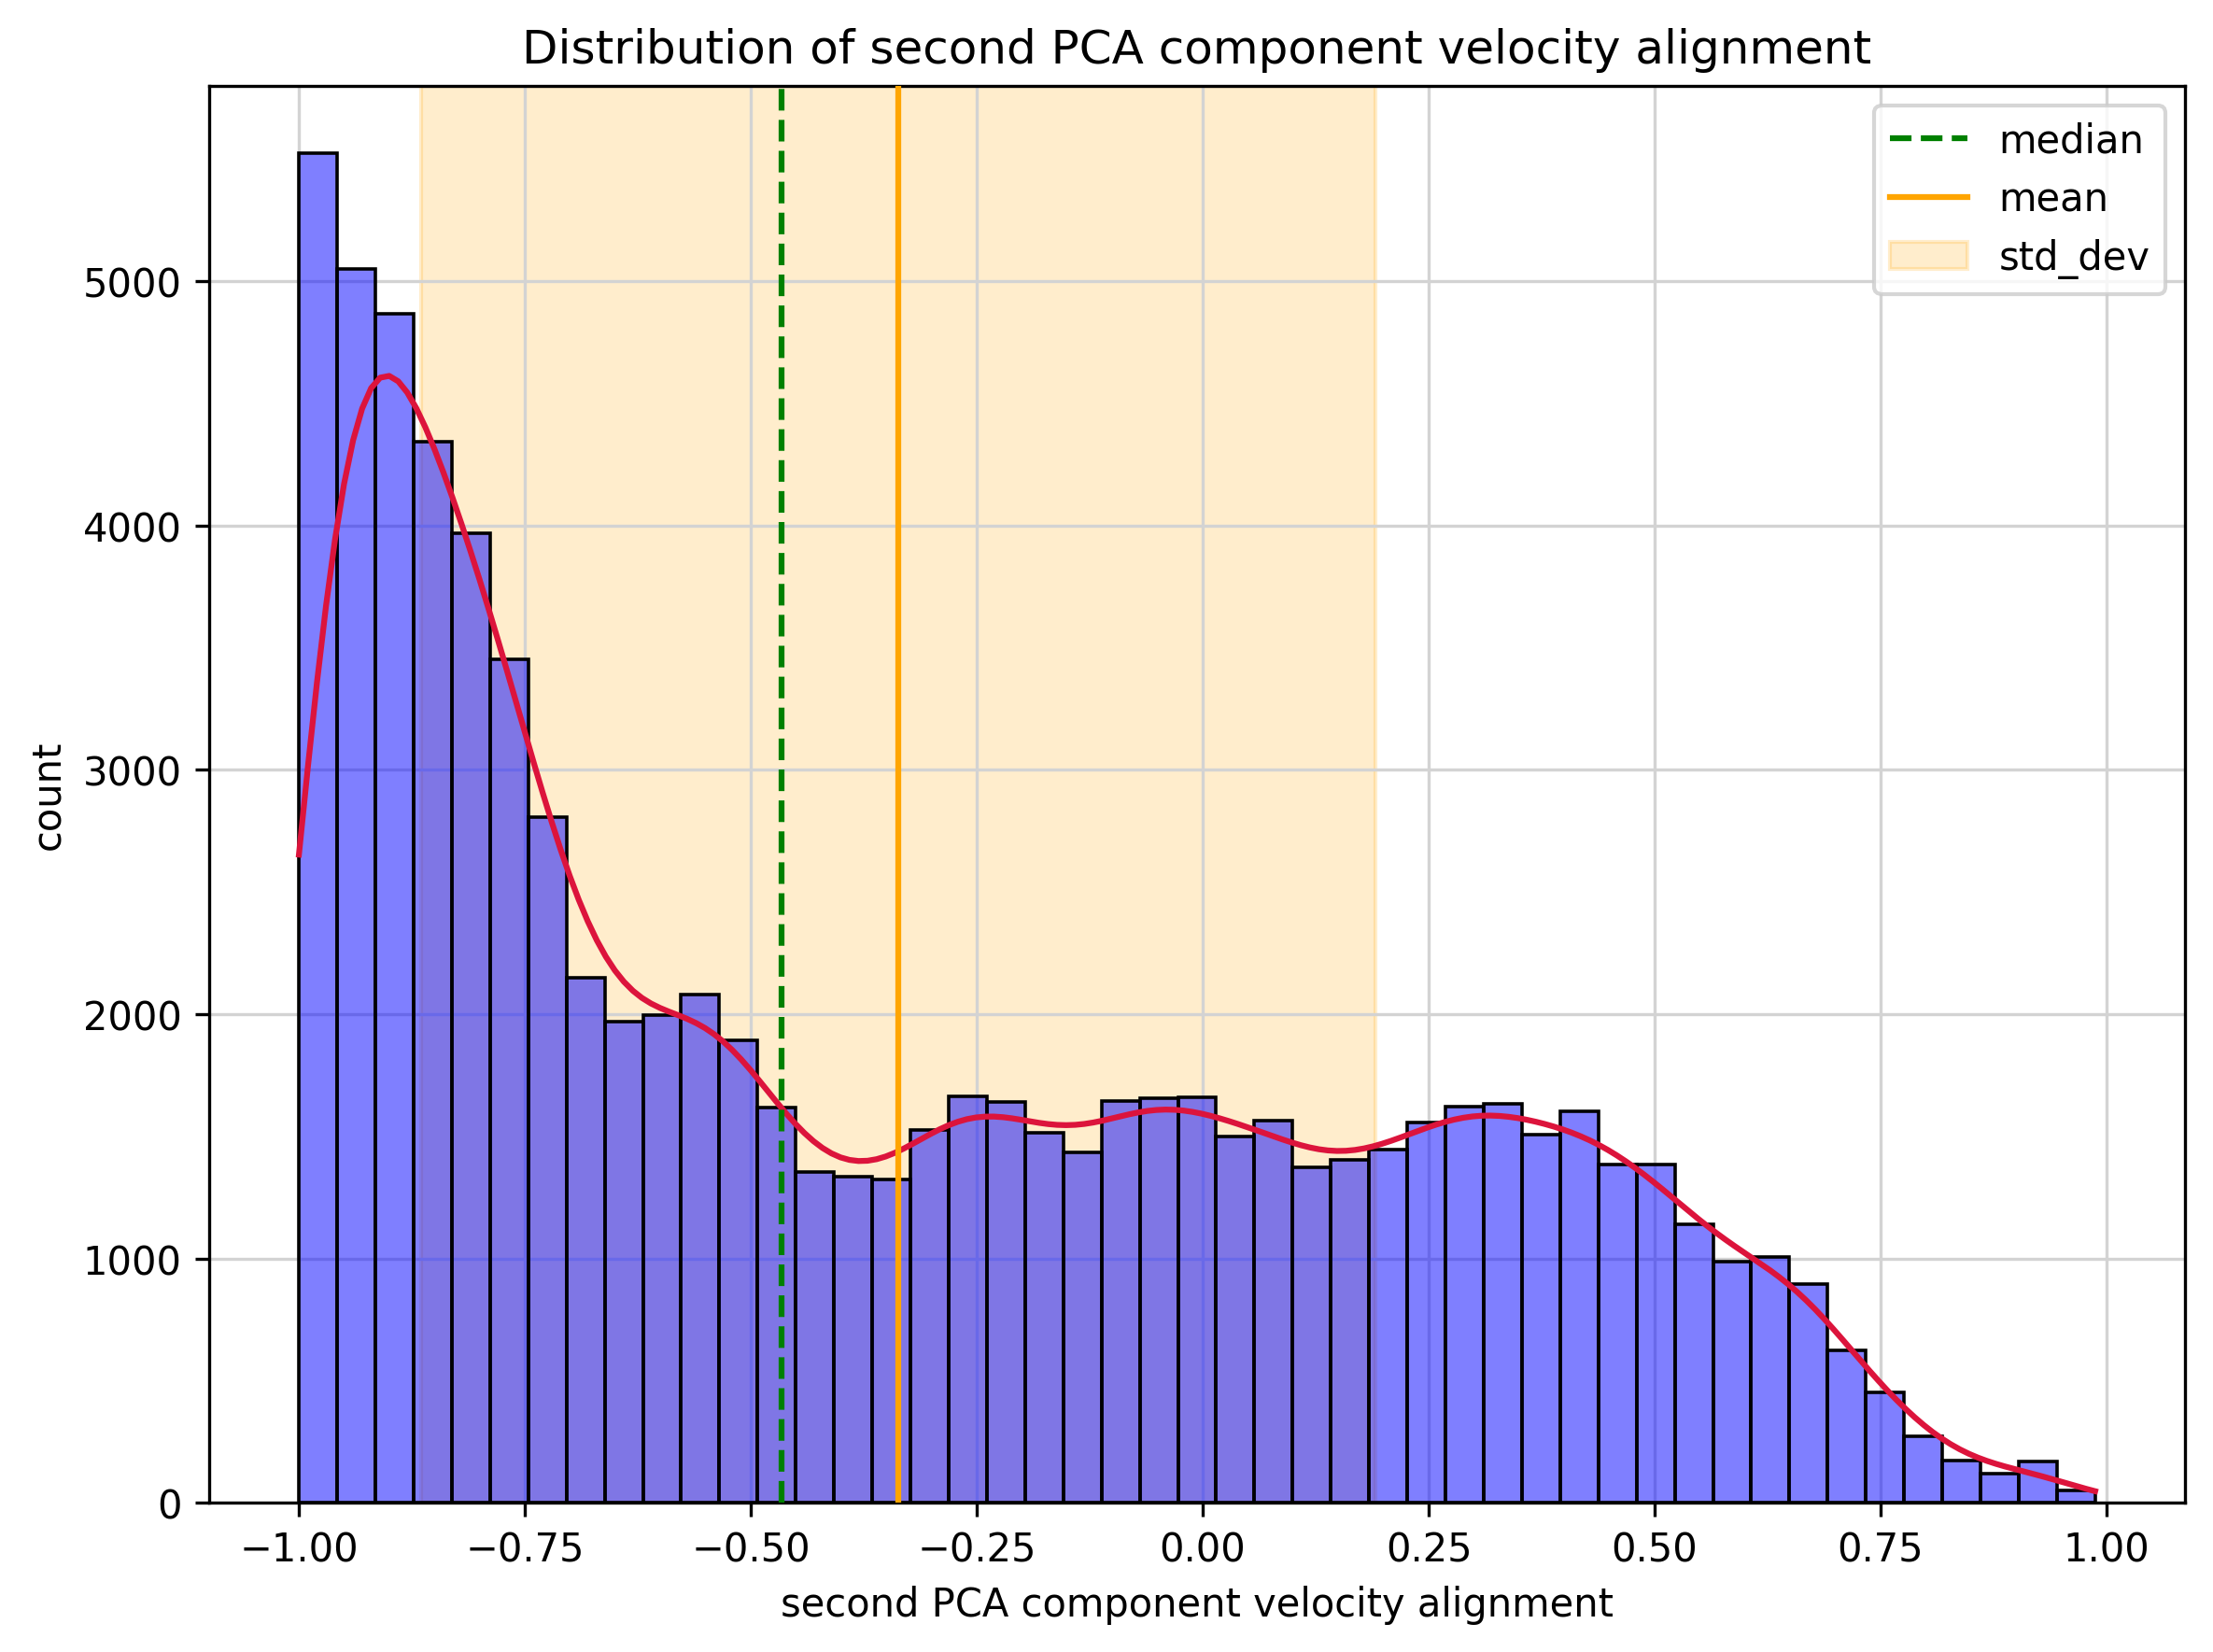

In [25]:
values = metric_arrays['second_pca_component_velocity_alignment']

values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')



# figure prettiness
plt.title('Distribution of second PCA component velocity alignment')
plt.xlabel('second PCA component velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()



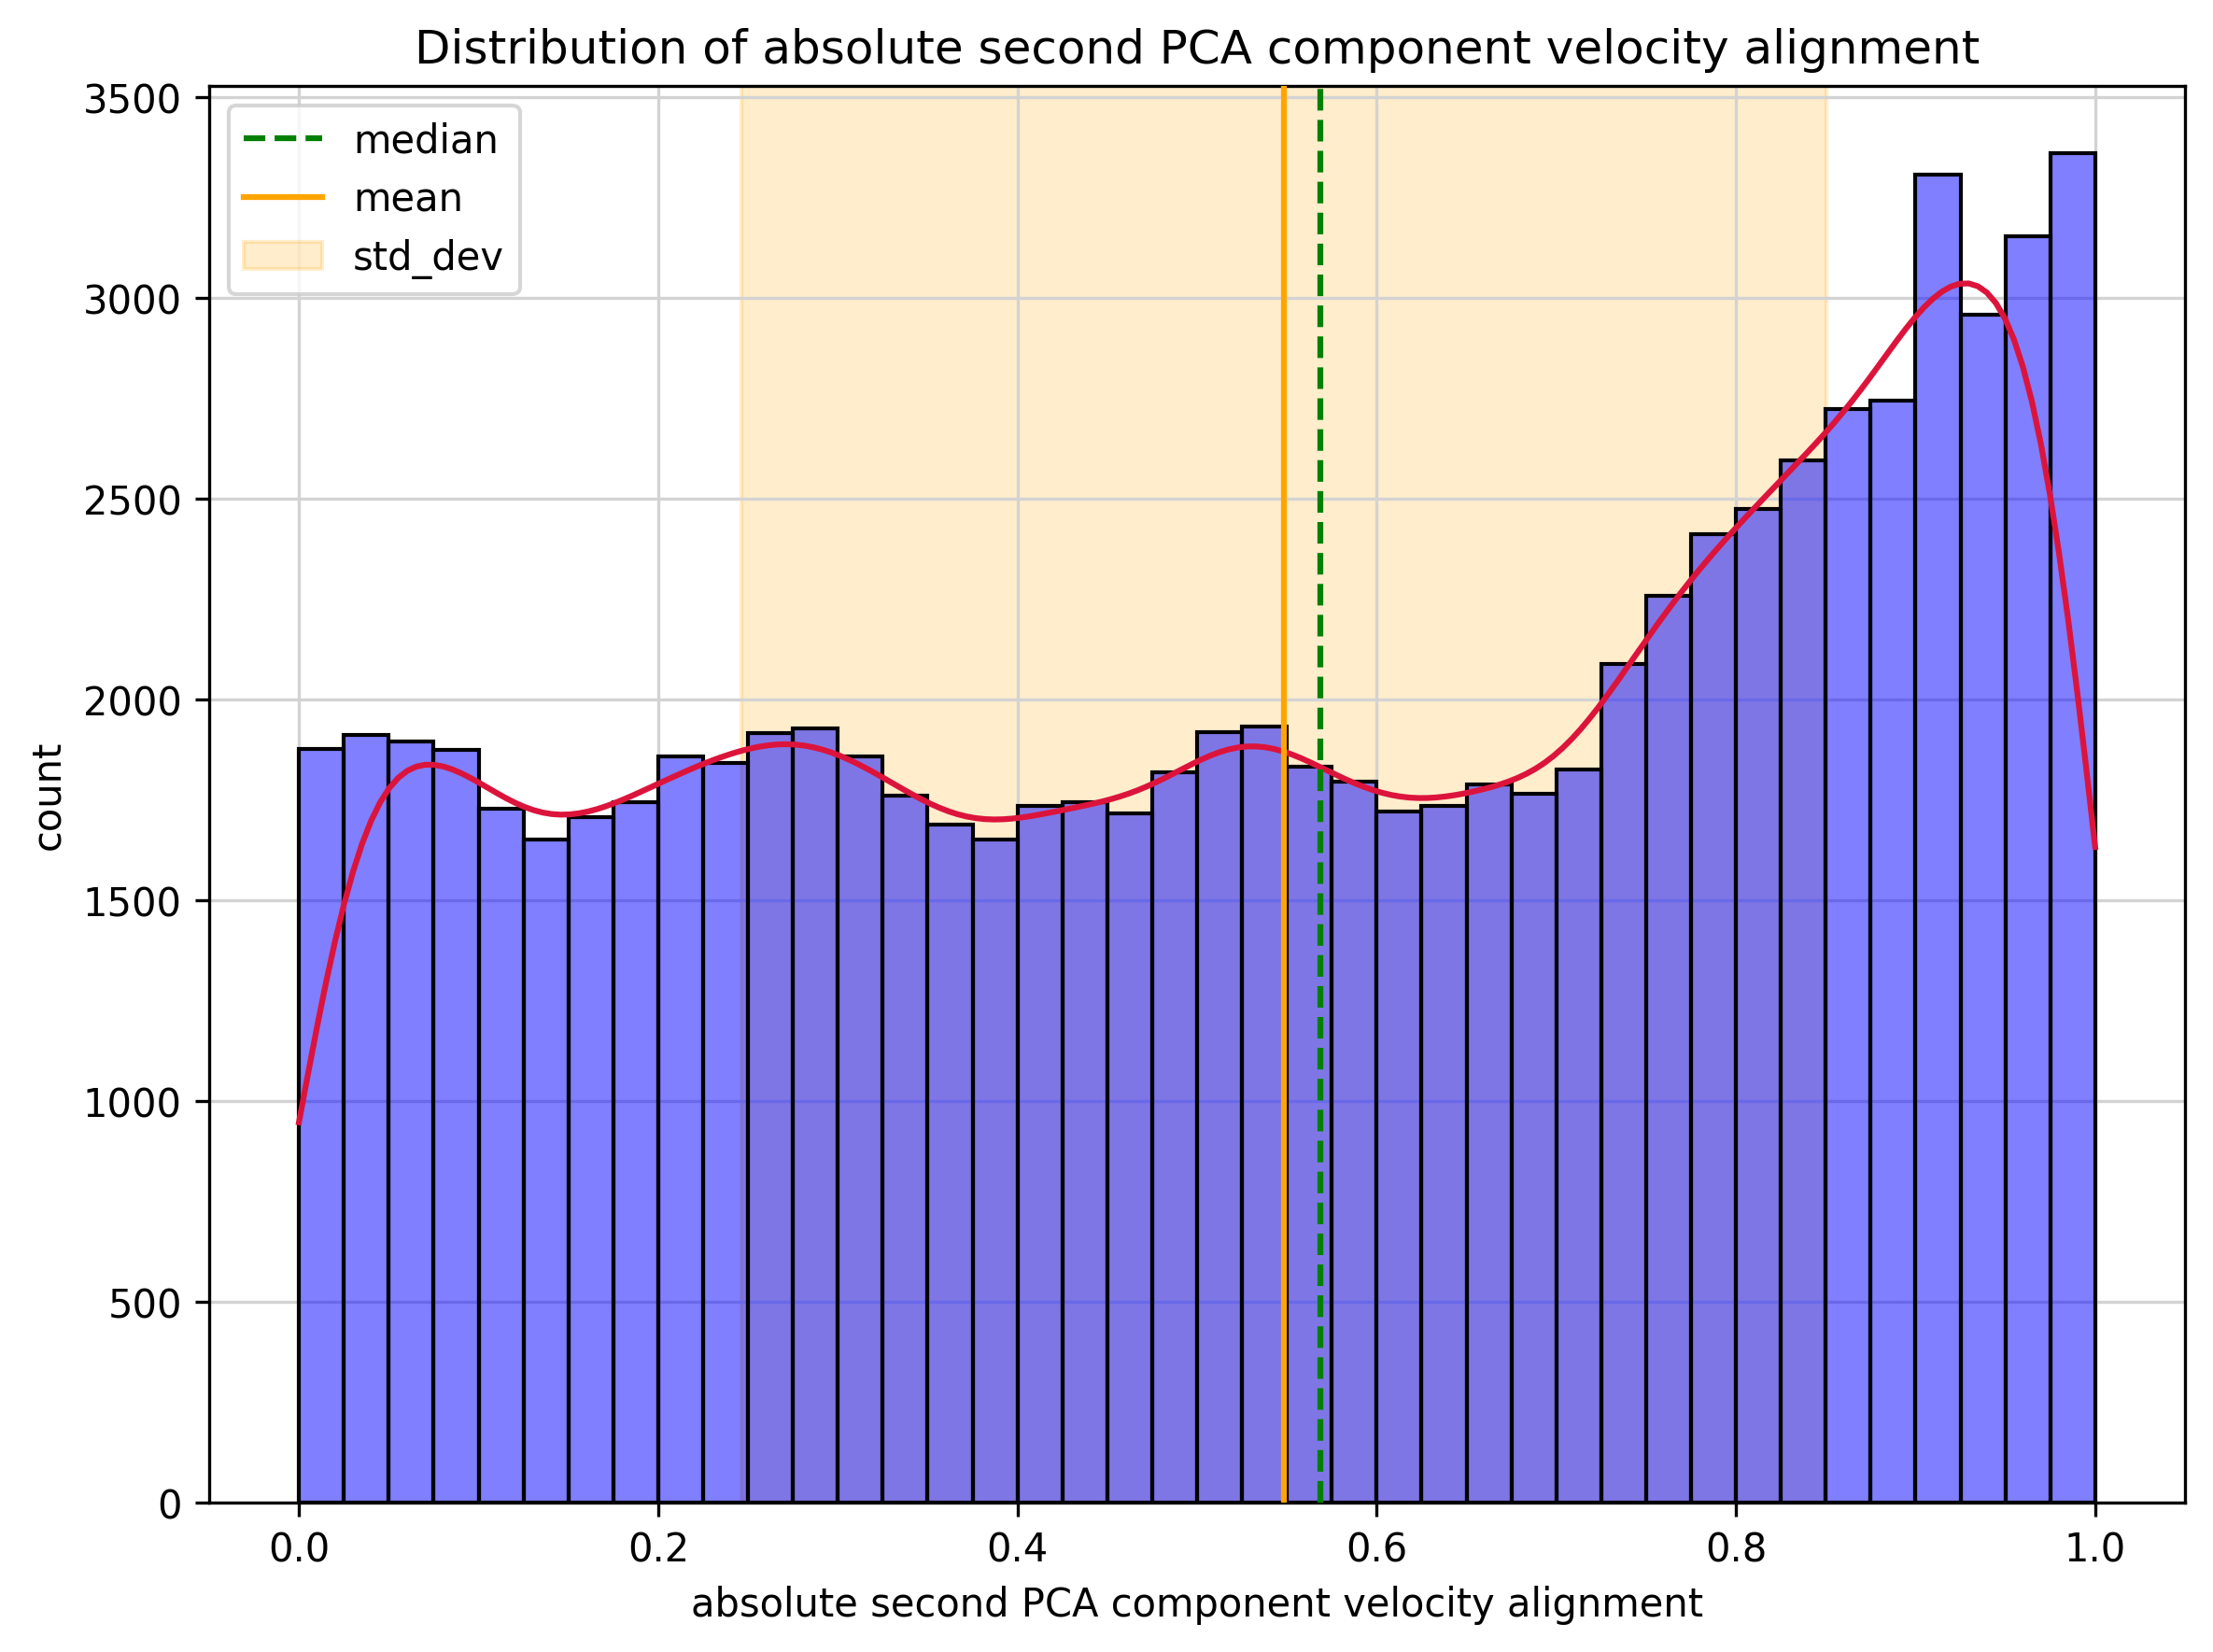

In [26]:
values = metric_arrays['second_pca_component_velocity_alignment']

values = np.abs(values)
values = values[np.isfinite(values)]
mean = np.mean(values)
mean = np.mean(values)
median = np.median(values)
std_dev = np.std(values)


fig = plt.figure(figsize=(8, 6), dpi=300)

ax = sns.histplot(values, color="blue", kde=True, zorder=2)


for line in ax.lines:
    line.set_color('crimson')
    
plt.grid(color="lightgrey", zorder=0)

ax.axvline(median, color='green', label='median', linestyle='--', zorder=3)
ax.axvline(mean, color='orange', label='mean', linestyle='-', zorder=3)
ax.axvspan(mean - std_dev, mean + std_dev, color='orange', alpha=0.2, zorder=1, label='std_dev')



# figure prettiness
plt.title('Distribution of absolute second PCA component velocity alignment')
plt.xlabel('absolute second PCA component velocity alignment')
plt.ylabel('count')
plt.legend()

plt.tight_layout()

plt.show()

